<h1> 4. Suavizado con la función ets() de R </h1>
<h2> 4.1 Preprocesamiento de datos y packages </h2>

In [4]:
library(ggplot2)
library(xts)
library(forecast)
library(dplyr)
library(tseries)
library(zoo)
library(quantmod)
library(nortest) #Para pruebas de normalidad
library(TTR)
setwd("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\section1\\ARTF_2017_2020\\ABRIL_ARTF")
Ton_Netas_P <- read.csv("Toneladas_Netas__Productos_2014_2022.csv")#Leer DF
Ton_Netas_P <- Ton_Netas_P[-99,]#Elimino la última fila
Ton_Netas_P$X <- as.yearmon(as.factor(Ton_Netas_P$X), format ="%m/%Y")
T_N_Pro  <- Ton_Netas_P # Contiene las fechas
Ton_Netas_P <- xts(Ton_Netas_P[,c(2:6)], order.by = Ton_Netas_P$X )
T_N_P <-  data.frame(Ton_Netas_P) #Ordeno por fechas y la trae como indice
Maiz_ts <- ts(T_N_P[,1], frequency = 12, star = c(2014,1))

<h2> Suavizado en R </h2>

El suavizado en R hace este procedimiento de una manera más sencilla con la función *ets()* de la paquetería TTR. El código nos quedaría de la siguiente manera:

In [5]:
Suavizado_Maiz_R <- ets(Maiz_ts, model = "ZZZ")

Cuando se pone **model ="ZZZ"** le indicamos a R que nos calcule cual es el método más conveniente. En model = "Errores, Tendencia, Estacionalidad", los cuales podremos utilizar parámetros de la siguiente manera: 
- N = No hacer caso. 
- A = Tipo aditiva.
- M = Tipo Multiplicativa.
- Z = Que R calcule el tipo que se va a requerir.

<h2> Coeficientes del suavizado </h2>

In [6]:
Suavizado_Maiz_R

ETS(A,N,A) 

Call:
 ets(y = Maiz_ts, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.4203 
    gamma = 1e-04 

  Initial states:
    l = 1248315.1426 
    s = -67603.11 35512 -165933.2 59579.95 117925.9 142350.2
           298054.5 195854.2 -57446.23 -110278.5 -272243.4 -175772.1

  sigma:  127565.4

     AIC     AICc      BIC 
2768.471 2774.325 2807.246 

Lo anterior, tenemos que R nos da un modelo de la forma:
- Error de tipo aditivo.
- Tendencia no hacer caso.
- Estacionalidad de tipo aditivo 

La descomposición del modelo anterior queda de la siguiente manera:

<h2> Descomposición de la serie por el método ETS </h2>

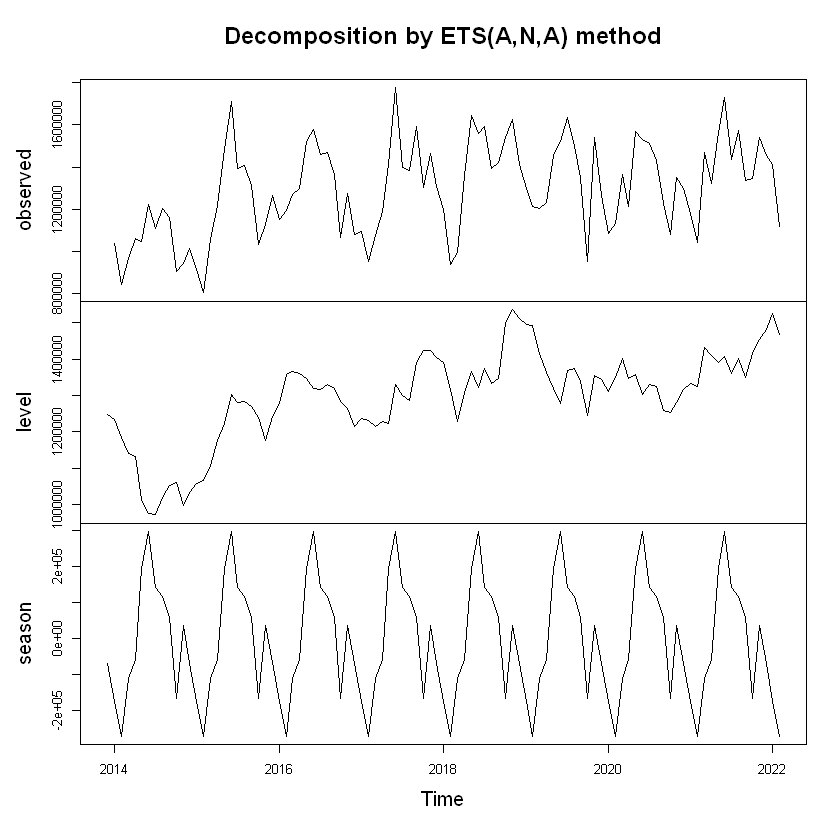

In [9]:
plot(Suavizado_Maiz_R)

<h2> Gráfica del suavizado vs original </h2>

Haciendo una gráfica de la serie maiz con el suavizado exponencial por $R$, tendremos lo siguiente:

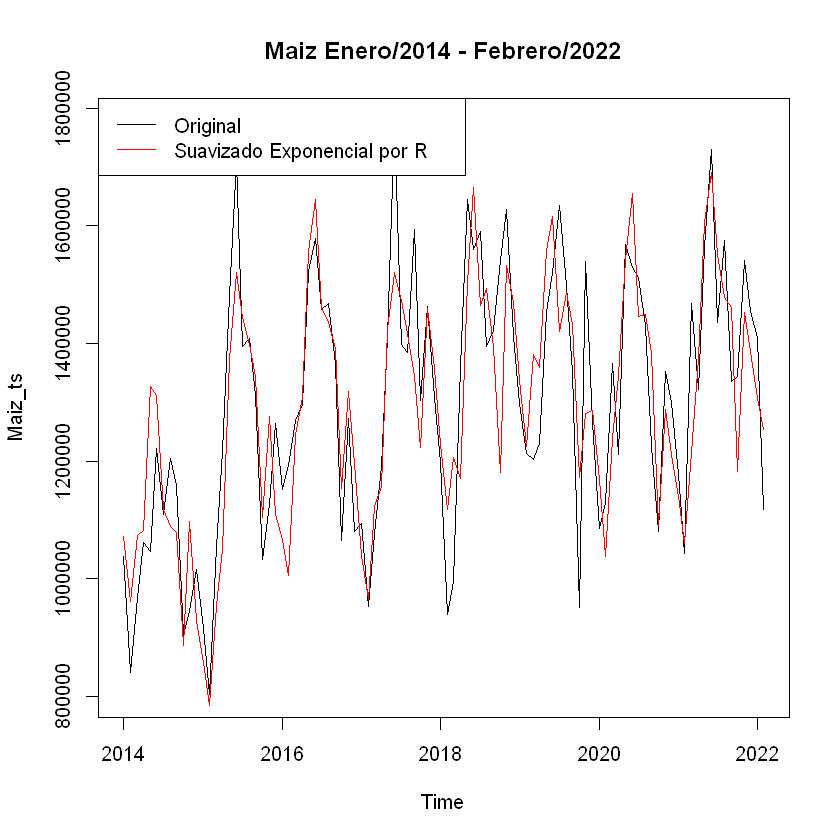

In [8]:
plot(Maiz_ts, main = "Maiz Enero/2014 - Febrero/2022" )
lines(Suavizado_Maiz_R$fitted , col = "red") #Suavizado Exponencial por R
legend(x="topleft", legend = c("Original", "Suavizado Exponencial por R"),
col = c("black", "red"), lty=1:1 ) 